### Project Workflow Status

**Problem Type:** Regression  
**Target Variable:** Price  

The **business understanding**, **analytic approach**, **data requirements**, and **data collection** phases have been completed for this project.  
The dataset was obtained from Kaggle and is considered sufficient to address the defined business problem.

At this stage, the project proceeds to the **Data Understanding** and **Data Preparation** phases, which include:
- Exploring the dataset structure and feature types  
- Assessing data quality and missing values  
- Performing data cleaning and transformations  
- Preparing the data for modeling  

Subsequent phases will focus on **Exploratory Data Analysis (EDA)**, **Modeling**, and **Evaluation**.


![Modeling Cycle](https://miro.medium.com/v2/1*YPsZO50dIiEKpW9RqzqsTw.jpeg)

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


# Train / test split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model selection & tuning (optional)
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from xgboost import XGBRegressor

import joblib

In [11]:
df = pd.read_csv('AB_NYC_2019.csv')

In [12]:
df.shape

(48895, 16)

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Dataset Columns Description (AB_NYC_2019)

1.id: Unique identifier for each Airbnb listing

2.name: Title of the Airbnb listing

3.host_id: Unique identifier for the host

4.host_name: Name of the host

5.neighbourhood_group: High-level area of New York City (e.g., Manhattan, Brooklyn)

6.neighbourhood: Specific neighborhood where the listing is located

7.latitude: Latitude coordinate of the listing location

8.longitude: Longitude coordinate of the listing location

9.room_type: Type of accommodation offered (entire home, private room, shared room)

10.price: Nightly price of the listing (target variable)

11.minimum_nights: Minimum number of nights a guest must book

12.number_of_reviews: Total number of reviews since the listing was created

13.last_review: Date of the most recent review

14.reviews_per_month: Average number of reviews received per month

15.calculated_host_listings_count: Number of listings owned by the same host (1 → individual person) -- (20+ → professional host / company)

16.availability_365: Number of days the listing is available for booking in the next 365 days

# 1.Data understanding 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


1- The dataset contains 48,895 Airbnb listings with 16 features.

2- The target variable is price, which shows:
Extreme outliers (up to 10,000)
Some invalid values (price = 0).

3-The data includes:
Numeric features (price, availability, reviews, location coordinates).
Categorical features (room type, neighbourhood, neighbourhood group).

4-Some columns contain missing values, mainly:
last_review, reviews_per_month, these likely indicate listings with no reviews.

5-ID-like columns (id, host_id) exist and do not carry predictive value.

6-Several features show extreme values, suggesting the need for outlier handling.

# 2.Data Wrangling(Preprocessing)

In [101]:
# We can see the difference between the mean and the median for the numerical values
# This indicates irrelevant values (negative values, outliers, and prices being 0).
# I will start with the target variable:

In [15]:
# Removing the negative values:
df = df[df['price'] > 0]
df['price'].describe()
# I can still see the diff between the mean and the median this is the result of outliers (very large max)

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [102]:
# I will not work with the outliers (regarding the target variable), as they should be dealt with using a log transform.# As for the other null values we can see that there are null values at the {name, host_name, last_review and reviews_per_month} so we have to deal with them.

# As for the other null values, we can see that there are null values in name, host_name, last_review, and reviews_per_month, so we have to deal with them.

In [98]:
print((df['price'] > 200).sum())
print((df['price'] > 200).mean() * 100)
# The percentage is 17% for the outliers for price...


8384
17.15080598968988


In [16]:
# As for the name, host_name and the id / theses columns won't help me - So I will drop them.
df = df.drop(columns=['name', 'host_name'])

# As for the last_reviews I want to extract the year as it might help me with EDA.
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review_year'] = df['last_review'].dt.year

# As for reviews per month ill fill the null values with 0.
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [17]:
df = df.drop(columns=['id'])

In [18]:
df = df.drop(columns=['host_id'])

In [86]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [87]:
df.duplicated().sum()

np.int64(0)

# 3.Data Exploratory (EDA)

### I will start by revewing the data it self.

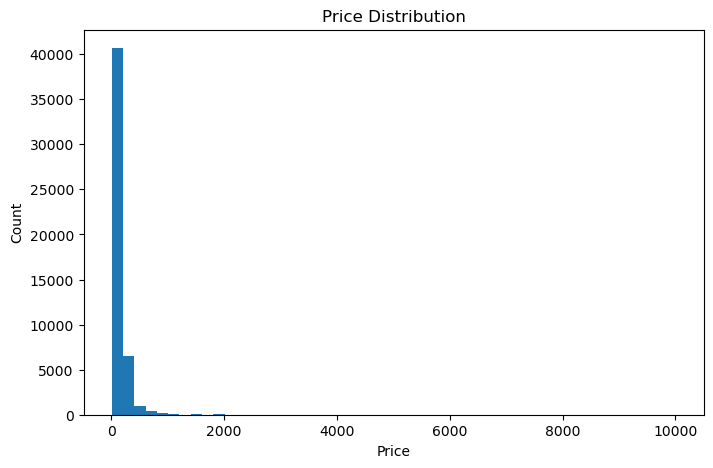

<Axes: >

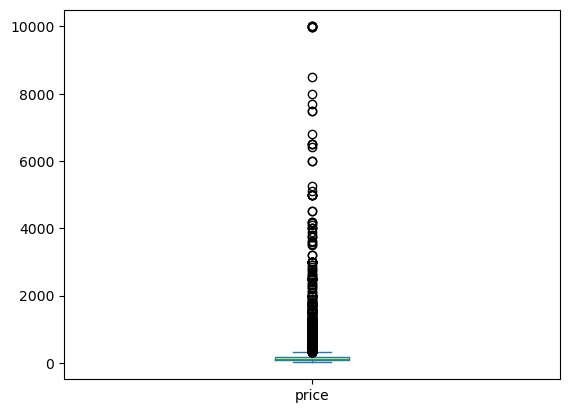

In [93]:
# Lets check the target variable:

plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()


df['price'].plot(kind='box')
# price is skewed

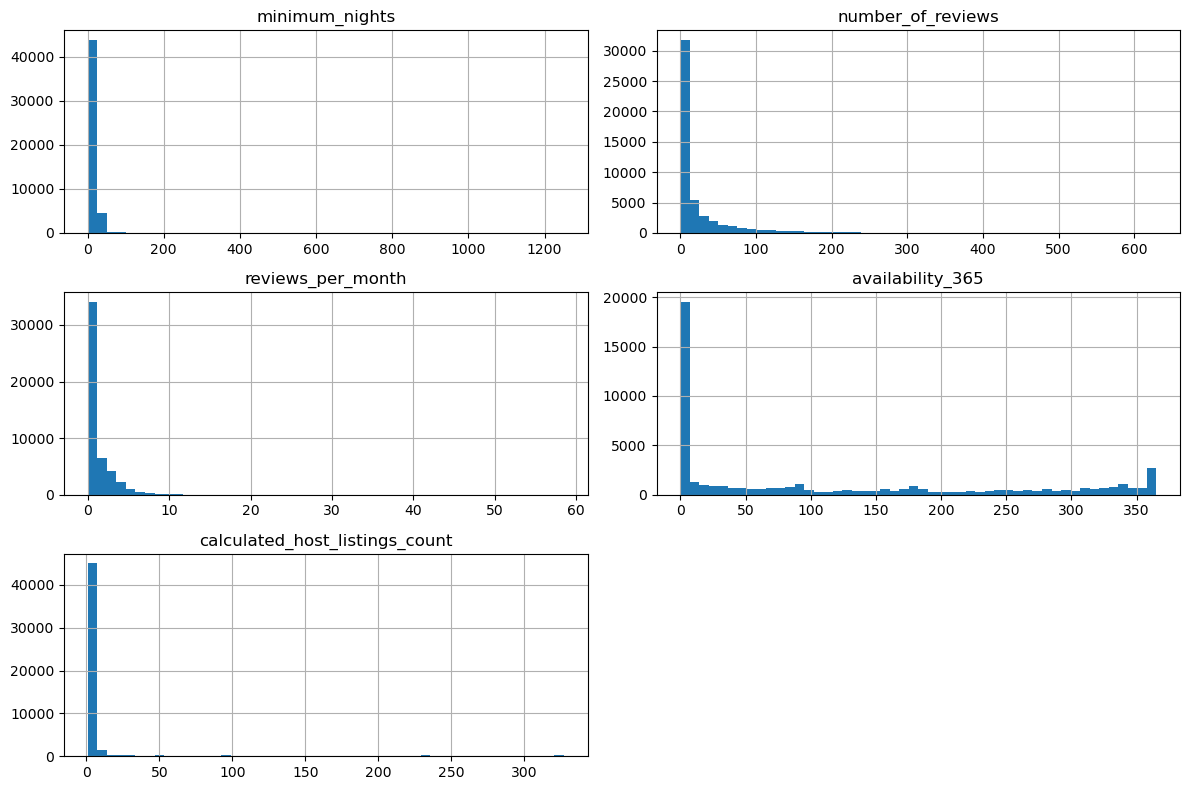

In [38]:
numeric_cols = df[['minimum_nights',  'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']]
numeric_cols.hist(figsize=(12,8), bins=50)
plt.tight_layout()
plt.show()

# We can see that all the data need to be scaled 

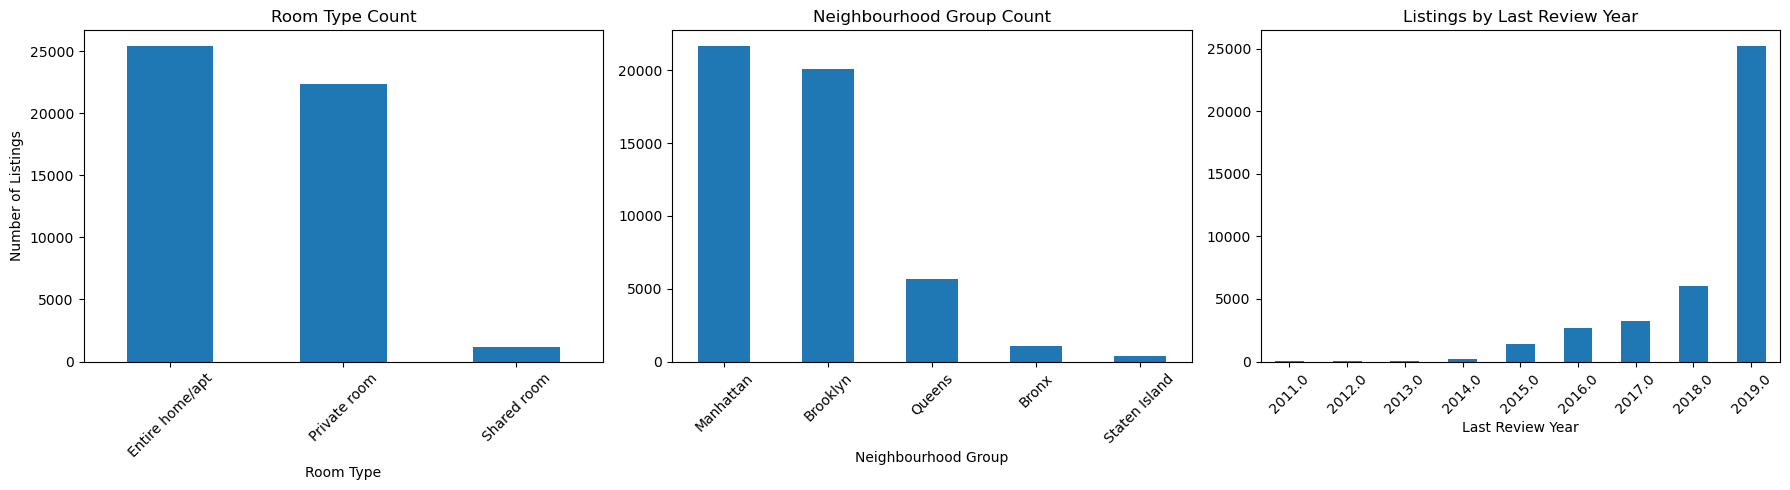

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Room type
df['room_type'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Room Type Count')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Number of Listings')
axes[0].tick_params(axis='x', rotation=45)

# Neighbourhood group
df['neighbourhood_group'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Neighbourhood Group Count')
axes[1].set_xlabel('Neighbourhood Group')
axes[1].tick_params(axis='x', rotation=45)

#Last review year
df['last_review_year'].value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Listings by Last Review Year')
axes[2].set_xlabel('Last Review Year')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


###  Now that We have revewid the data itself, lets review the data comparing to the target variable(Price) starting with categorical variables VS Price

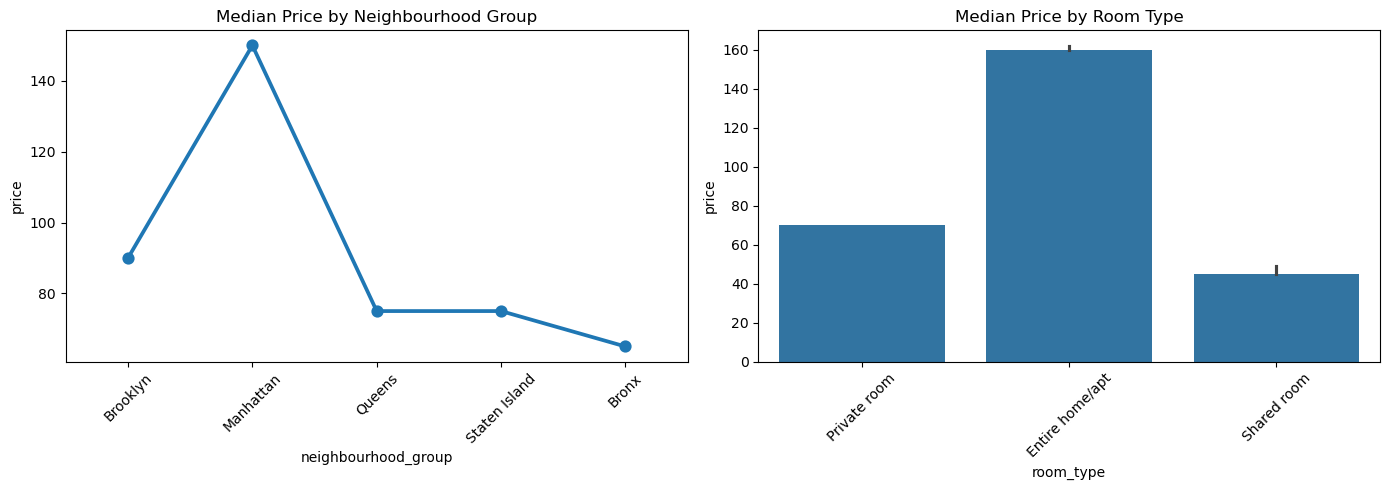

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.pointplot(
    x='neighbourhood_group',
    y='price',
    data=df,
    estimator='median',
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('Median Price by Neighbourhood Group')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='room_type',
    y='price',
    data=df,
    estimator='median',
    ax=axes[1]
)
axes[1].set_title('Median Price by Room Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



### We can see that approximitly the prices are in the 0-250 area.
### We can observe that categorical variables strongly affect price.

### 1.Different room types = different products
### 2.Different locations = different markets


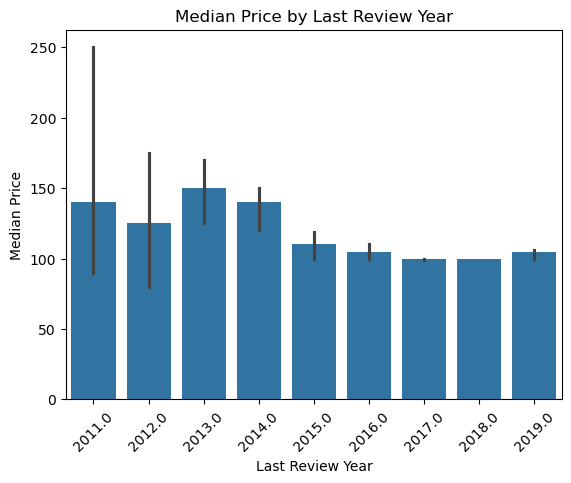

In [68]:
sns.barplot(
    x='last_review_year',
    y='price',
    data=df,
    estimator='median'
)
plt.xlabel('Last Review Year')
plt.ylabel('Median Price')
plt.title('Median Price by Last Review Year')
plt.xticks(rotation=45)
plt.show()

# After revewing it, I will drop it as its not needed for modeling 
df = df.drop(columns=['last_review', 'last_review_year'])

# Now lets review the numerical variables VS Price
### Numeric features to check, minimum_nights, number_of_reviews, reviews_per_month, availability_365 and calculated_host_listings_count

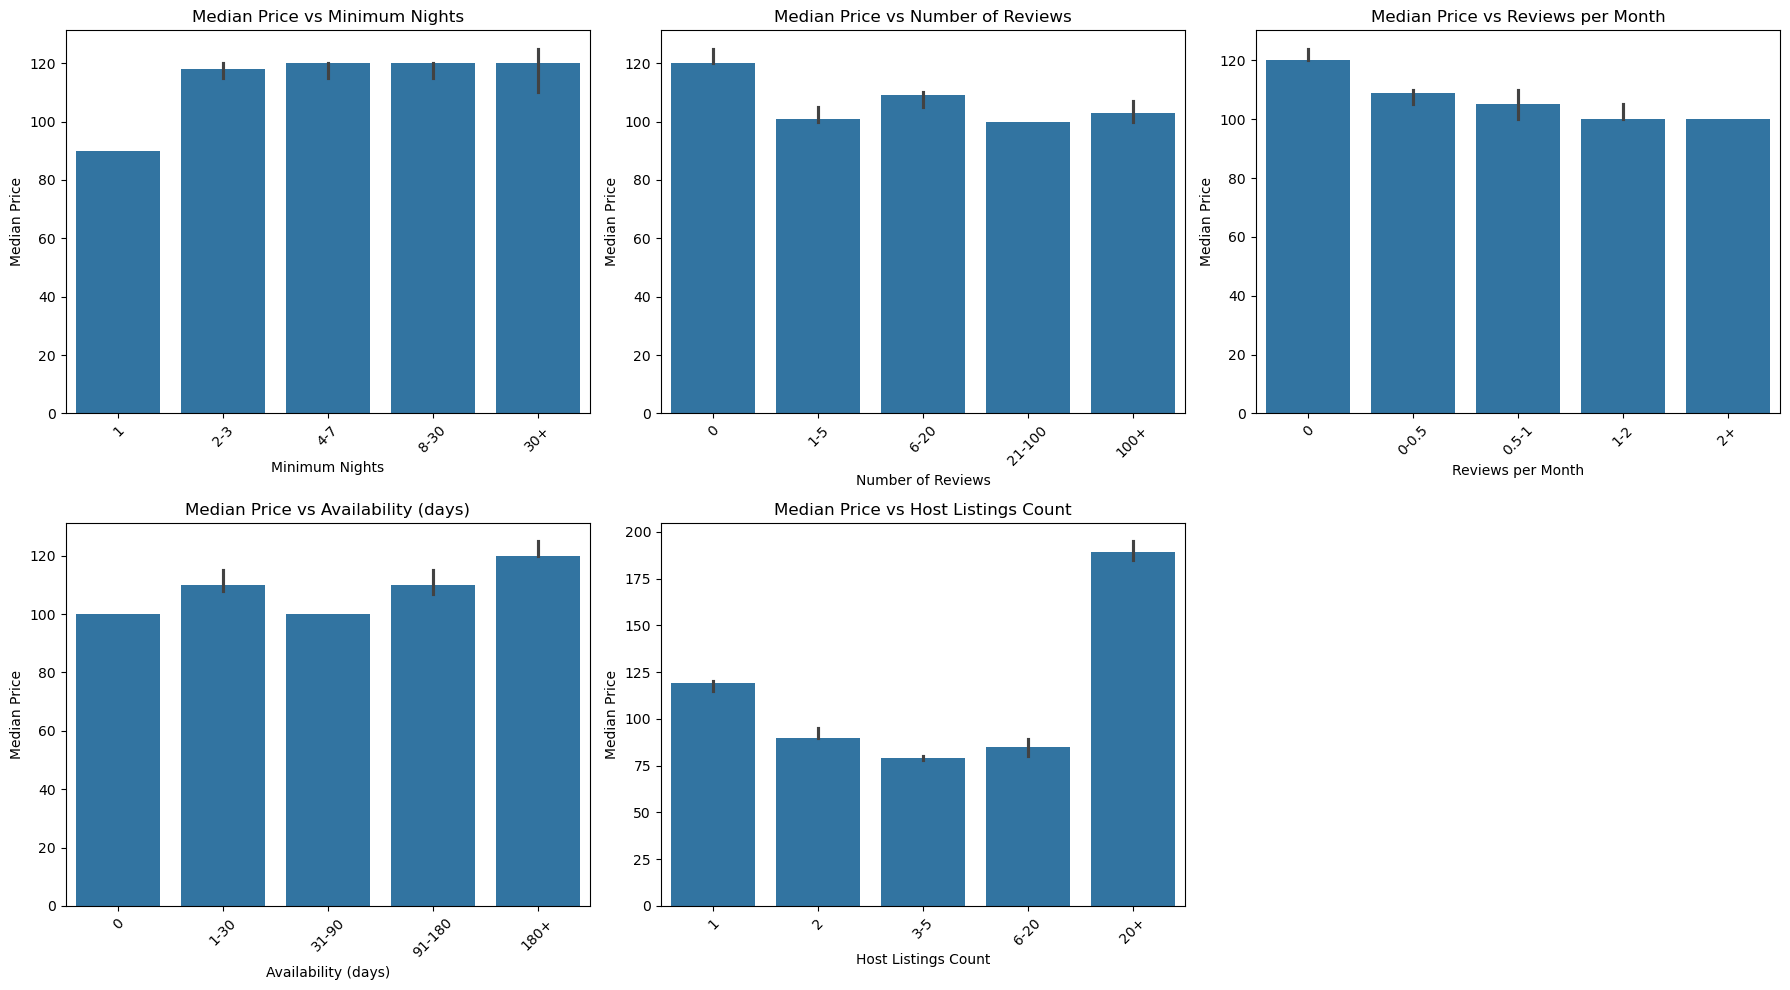

In [66]:
# I created bins and as the scatter plot didnt help me with understanding the data

df['min_nights_bin'] = pd.cut(
    df['minimum_nights'],
    bins=[0,1,3,7,30,365],
    labels=['1','2-3','4-7','8-30','30+']
)

df['reviews_bin'] = pd.cut(
    df['number_of_reviews'],
    bins=[-1,0,5,20,100,1000],
    labels=['0','1-5','6-20','21-100','100+']
)

df['reviews_pm_bin'] = pd.cut(
    df['reviews_per_month'],
    bins=[-0.01,0,0.5,1,2,10],
    labels=['0','0-0.5','0.5-1','1-2','2+']
)

df['availability_bin'] = pd.cut(
    df['availability_365'],
    bins=[-1,0,30,90,180,365],
    labels=['0','1-30','31-90','91-180','180+']
)

df['host_listings_bin'] = pd.cut(
    df['calculated_host_listings_count'],
    bins=[0,1,2,5,20,400],
    labels=['1','2','3-5','6-20','20+']
)



fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

plots = [
    ('min_nights_bin', 'Minimum Nights'),
    ('reviews_bin', 'Number of Reviews'),
    ('reviews_pm_bin', 'Reviews per Month'),
    ('availability_bin', 'Availability (days)'),
    ('host_listings_bin', 'Host Listings Count')
]

for ax, (col, title) in zip(axes, plots):
    sns.barplot(
        x=col,
        y='price',
        data=df,
        estimator='median',
        ax=ax
    )
    ax.set_title(f'Median Price vs {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Median Price')
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### We can observe, so far 

### Listings with 1-night minimum are cheaper. Prices stabilize and slightly increase for longer minimum stays → weak positive effect.

### Listings with no or few reviews tend to be more expensive. More reviews generally correlate with slightly lower prices → weak negative relationship.

### Higher booking activity (more reviews/month) is associated with lower median prices. Suggests competitive pricing for high-demand listings.

### Listings with high availability tend to have higher prices. Availability does not show a strong or consistent pricing signal.

### Hosts with many listings (20+) charge significantly higher prices. Indicates professional hosts price differently than individual hosts.

#### I wanted to check the correlation between the target variable and the nuemrical feautres, we can see that the data obv is not linear....

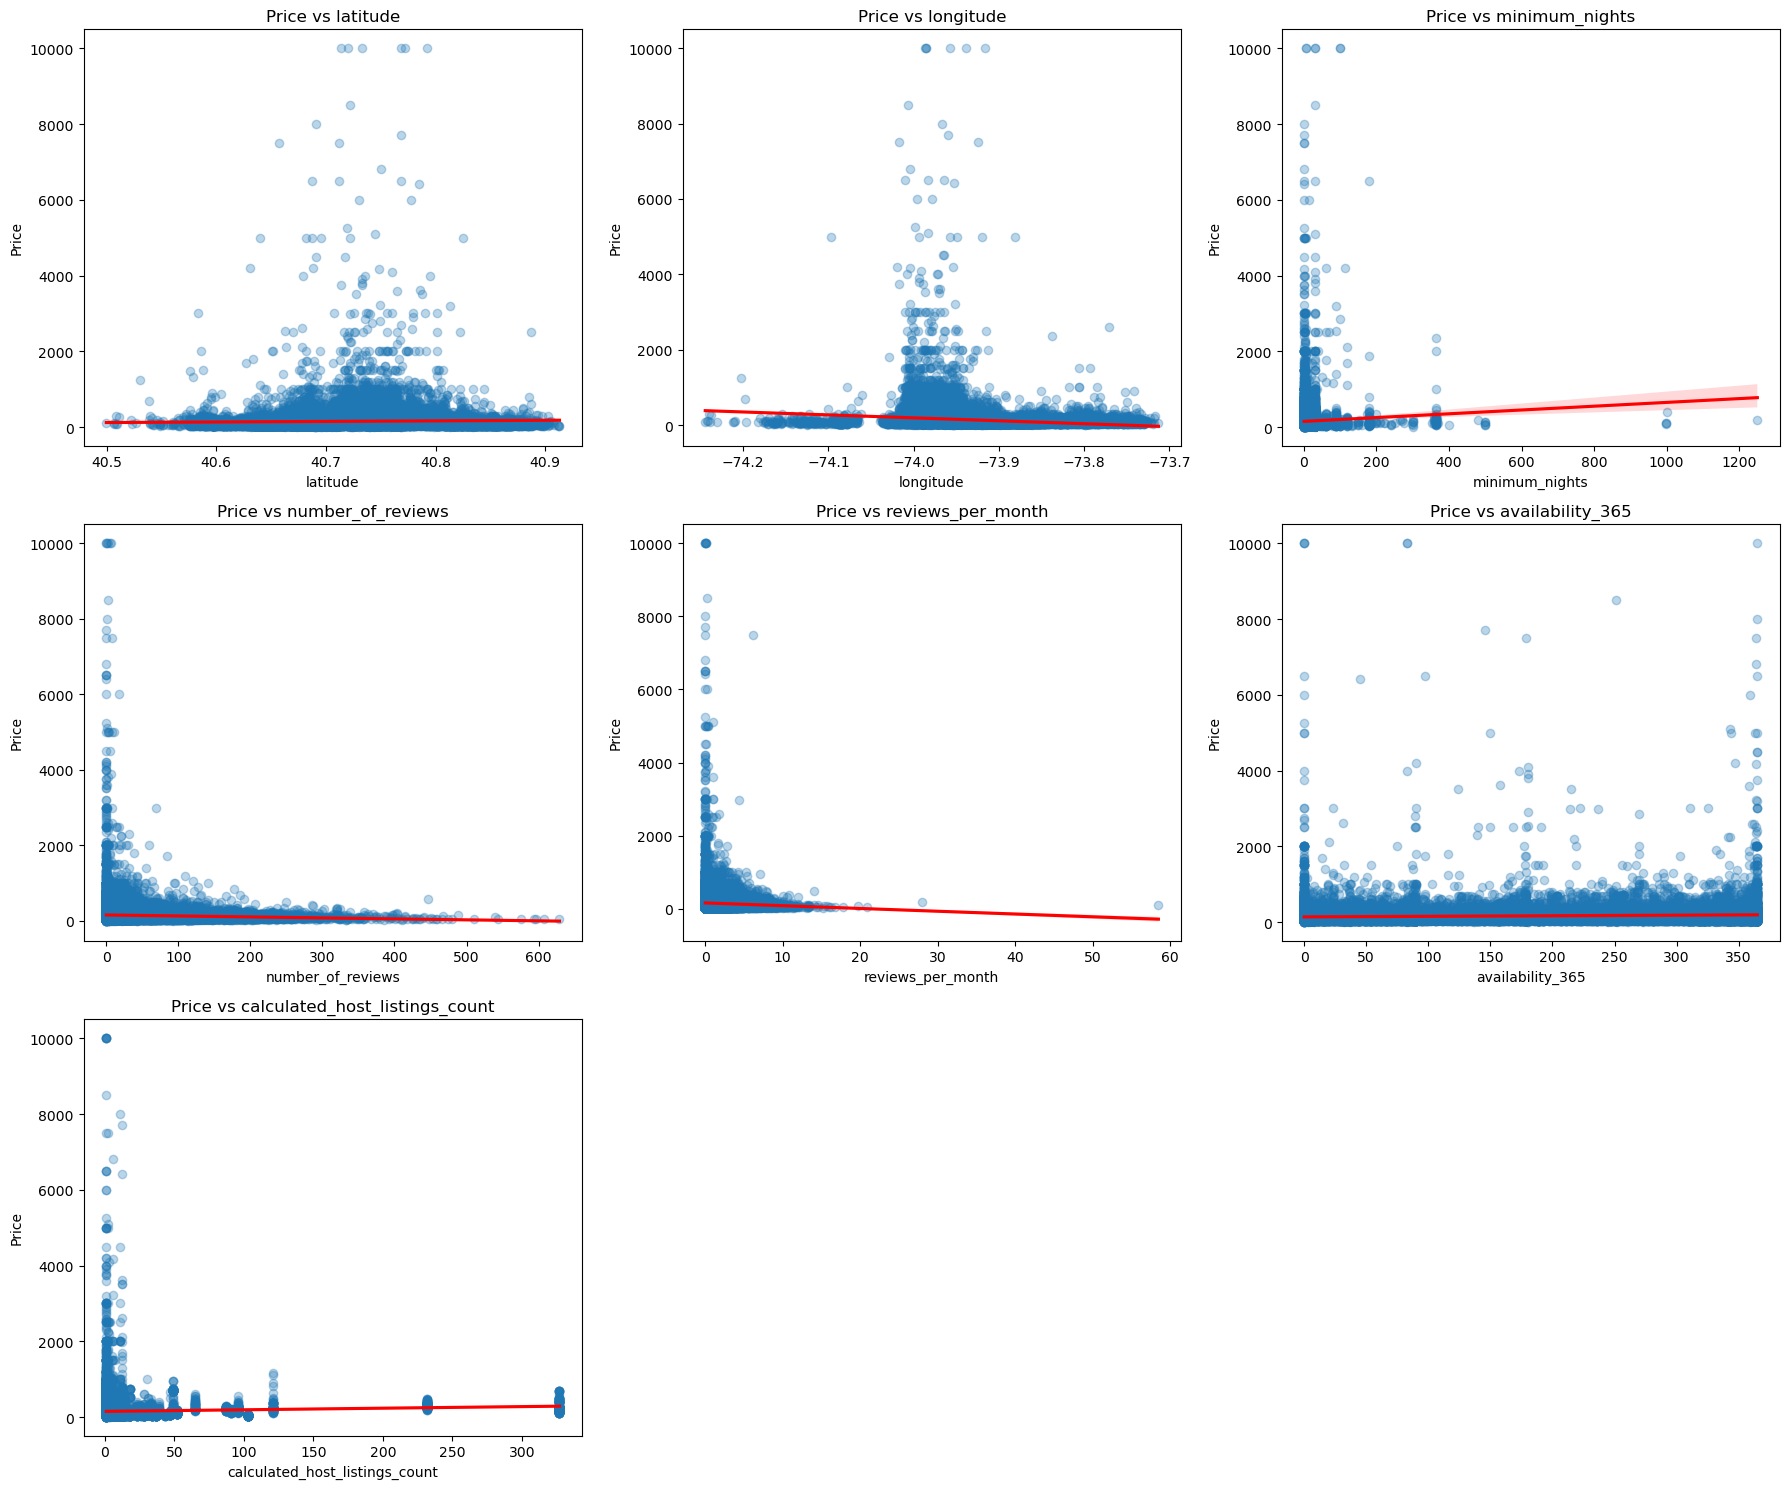

In [159]:

import seaborn as sns
import matplotlib.pyplot as plt

num_features = [
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'availability_365',
    'calculated_host_listings_count'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.regplot(
        x=df[col],
        y=df['price'],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'},
        ax=ax
    )
    ax.set_title(f'Price vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

# Remove unused subplots
for i in range(len(num_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Now that We have finished Data wrangling and EDA we start with modeling. 

### Before starting with Modeling ill remove the un needed columns so it doesn't affect the model performance. 

In [69]:
df = df.drop(columns=[
    'min_nights_bin',
    'reviews_bin',
    'reviews_pm_bin',
    'availability_bin',
    'host_listings_bin'
])

print(df.columns)

print(df.info())

print(df.describe())

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48884 non-null  object 
 1   neighbourhood                   48884 non-null  object 
 2   latitude                        48884 non-null  float64
 3   longitude                       48884 non-null  float64
 4   room_type                       48884 non-null  object 
 5   price                           48884 non-null  int64  
 6   minimum_nights                  48884 non-null  int64  
 7   number_of_reviews               48884 non-null  int64  
 8   reviews_per_month            

### My workflow will be like this:

1.Linear / Ridge as there is no linear relation ship but as a basline model

2.Decision Tree

3.Random Forest

4.Gradient Boosting

5.XGBoost

In [19]:
X = df.drop(columns=['price'])
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Using log() to help minimizing the price outliers 
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

In [20]:
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()  
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [21]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [33]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [34]:
param_grid = {
    'model__fit_intercept': [True, False],
    'model__positive': [False, True]
}

In [35]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [36]:
Linear_grid = GridSearchCV(estimator = pipeline, param_grid= param_grid, cv=cv, scoring='neg_root_mean_squared_error', verbose=2)  
Linear_grid.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...model__fit_intercept=True, model__positive=False; total time=   0.8s
[CV] END ...model__fit_intercept=True, model__positive=False; total time=   0.1s
[CV] END ...model__fit_intercept=True, model__positive=False; total time=   0.1s
[CV] END ...model__fit_intercept=True, model__positive=False; total time=   0.1s
[CV] END ...model__fit_intercept=True, model__positive=False; total time=   0.1s
[CV] END ....model__fit_intercept=True, model__positive=True; total time=   0.0s
[CV] END ....model__fit_intercept=True, model__positive=True; total time=   0.0s
[CV] END ....model__fit_intercept=True, model__positive=True; total time=   0.0s
[CV] END ....model__fit_intercept=True, model__positive=True; total time=   0.0s
[CV] END ....model__fit_intercept=True, model__positive=True; total time=   0.0s
[CV] END ..model__fit_intercept=False, model__positive=False; total time=   0.1s
[CV] END ..model__fit_intercept=False, model__pos

D:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\Anaconda3\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~~

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'minimum_nights',
                                                                          'number_of_reviews',
                                                                          'reviews_per_month',
                                                                          'calculated_host_listings_count',
                                                                          '...
                                                                          'last_review_year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['neighbourhood_group',
                                                                          'neighbourhood',
                                                                          'room_type'])])),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'model__positive': [False, True]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [244]:
print("Best hyperparameters:", Linear_grid.best_params_)
print("Best CV RMSE:", -Linear_grid.best_score_)

Best hyperparameters: {'model__fit_intercept': False, 'model__positive': False}
Best CV RMSE: 232.34599249956722


In [245]:
r2 = Linear_grid.best_estimator_.score(X_test, y_test)
print("R² score:", r2)

R² score: 0.13511932122759385


In [246]:
y_pred = Linear_grid.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse =  mean_squared_error(y_test, y_pred)
print("MSE:", mse)

RMSE: 186.08148453223285
MAE: 70.82706254733645
MSE: 34626.318885719615


### We can see that the R2 is 0.13 - we can get better results as we can observe that the relation ship between the data is not linear... , and the RMSE is not where we want it to be...

## I will try to fix the target variable(its outliers) by using a log

In [37]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [38]:
param_grid = {
    'model__fit_intercept': [True, False],
    'model__positive': [False, True]
}

In [39]:
Linear_rand = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

Linear_rand.fit(X_train, y_train_log)

D:\Anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


D:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\Anaconda3\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~~

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'reviews_per_month',
                                                                                'calculated_host_listings_co...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['neighbourhood_group',
                                                                                'neighbourhood',
                                                                                'room_type'])])),
                                             ('model', LinearRegression())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__fit_intercept': [True, False],
                                        'model__positive': [False, True]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [298]:
y_pred_log = Linear_rand.predict(X_test)

# Inverse transform to original price scale
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test_log)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mae  = mean_absolute_error(y_test_orig, y_pred)
r2   = r2_score(y_test_orig, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 187.12784566021628
MAE: 60.06424642300778
R²: 0.12536529406208174


## It seems like it didnt help.

In [40]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(random_state=42))
])

In [41]:
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__fit_intercept': [True, False],
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

In [42]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
Ridge_grid = GridSearchCV(estimator = pipeline, param_grid= param_grid, cv=cv, scoring='neg_root_mean_squared_error', verbose=2)  
Ridge_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=auto; total time=   0.1s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=auto; total time=   0.1s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=auto; total time=   0.1s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=auto; total time=   0.1s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=auto; total time=   0.1s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=svd; total time=   0.0s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=svd; total time=   0.0s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=svd; total time=   0.0s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=svd; total time=   0.0s
[CV] END model__alpha=0.01, model__fit_intercept=True, model__solver=svd; total time=   0.0s
[CV

D:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\Anaconda3\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'minimum_nights',
                                                                          'number_of_reviews',
                                                                          'reviews_per_month',
                                                                          'calculated_host_listings_count',
                                                                          '...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['neighbourhood_group',
                                                                          'neighbourhood',
                                                                          'room_type'])])),
                                       ('model', Ridge(random_state=42))]),
             param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100],
                         'model__fit_intercept': [True, False],
                         'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [44]:
print("Best hyperparameters:", Ridge_grid.best_params_)
print("Best CV RMSE:", -Ridge_grid.best_score_)

Best hyperparameters: {'model__alpha': 10, 'model__fit_intercept': False, 'model__solver': 'cholesky'}
Best CV RMSE: 232.18084846139217


In [45]:
r2 = Ridge_grid.best_estimator_.score(X_test, y_test)
print("R² score:", r2)

R² score: 0.1386604221732517


In [46]:
y_pred = Ridge_grid.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse =  mean_squared_error(y_test, y_pred)
print("MSE:", mse)

RMSE: 185.70015494954512
MAE: 70.41370558561802
MSE: 34484.54754828507


### Ridge barely improved over Linear

### R² still ~0.14

In [47]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

In [48]:
param_grid = {
    'model__max_depth': [None, 5, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 5, 10],
    'model__max_features': [None, 'sqrt', 'log2']
}

In [49]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [50]:
Tree_grid = GridSearchCV(estimator = pipeline, param_grid= param_grid, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)  
Tree_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'minimum_nights',
                                                                          'number_of_reviews',
                                                                          'reviews_per_month',
                                                                          'calculated_host_listings_count',
                                                                          '...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['neighbourhood_group',
                                                                          'neighbourhood',
                                                                          'room_type'])])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10, 20, 30],
                         'model__max_features': [None, 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 5, 10],
                         'model__min_samples_split': [2, 5, 10, 20]},
             scoring='neg_root_mean_squared_error')

In [262]:
print("Best hyperparameters:", Tree_grid.best_params_)
print("Best CV RMSE:", Tree_grid.best_score_)

Best hyperparameters: {'model__max_depth': 5, 'model__max_features': None, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}
Best CV RMSE: -235.406508263441


In [263]:
r2 = Tree_grid.best_estimator_.score(X_test, y_test)
print("R² score:", r2)

R² score: 0.11045605472689635


In [264]:
y_pred = Tree_grid.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse =  mean_squared_error(y_test, y_pred)
print("MSE:", mse)

RMSE: 188.71601990686256
MAE: 69.88994338749357
MSE: 35613.73616948735


### The dataset is clean; weak performance of linear and single-tree models indicates the need for ensemble methods.

In [51]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

In [52]:
param_dist = {
    'model__n_estimators': randint(100, 600),
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': randint(2, 11),
    'model__min_samples_leaf': randint(1, 6),
    'model__max_features': ['sqrt', 0.5]
}

In [53]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [54]:
Random_grid = RandomizedSearchCV(
    estimator=pipeline,
     param_distributions = param_dist,
    n_iter=10,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [55]:
Random_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'reviews_per_month',
                                                                                'calculated_host_listings_co...
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E955F4AFD0>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E955F48550>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E955F446E0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [270]:
print("Best hyperparameters:", Random_grid.best_params_)
print("Best CV RMSE:", -Random_grid.best_score_)

# ===== Test Evaluation =====
r2 = Random_grid.best_estimator_.score(X_test, y_test)
print("R² score:", r2)

y_pred = Random_grid.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

Best hyperparameters: {'model__max_depth': 30, 'model__max_features': 0.5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 148}
Best CV RMSE: 225.18146293699687
R² score: 0.21689018172554642
RMSE: 177.06649844611215
MAE: 63.0863845796422
MSE: 31352.54487196703


#### Better results but not the best, lets try GradientBoosing

In [56]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

In [57]:
param_dist = {
    'model__n_estimators': randint(100, 600),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__max_depth': randint(2, 6),
    'model__min_samples_split': randint(2, 11),
    'model__min_samples_leaf': randint(1, 6),
    'model__subsample': uniform(0.6, 0.4)
}

In [58]:
GB_grid = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [59]:
GB_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'reviews_per_month',
                                                                                'calculated_host_listings_co...
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E94CC7E570>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E954CA9A70>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E955F48410>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [275]:
print("Best hyperparameters:", GB_grid.best_params_)
print("Best CV RMSE:", -GB_grid.best_score_)


Best hyperparameters: {'model__learning_rate': np.float64(0.03789877213040837), 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4, 'model__n_estimators': 463, 'model__subsample': np.float64(0.8056937753654446)}
Best CV RMSE: 228.58625739588146


In [276]:
r2 = GB_grid.best_estimator_.score(X_test, y_test)
print("R² score:", r2)

y_pred = GB_grid.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

R² score: 0.18252804658165023
RMSE: 180.9095507916973
MAE: 65.38919793197208
MSE: 32728.26556765371


In [103]:
# Ill try log(price) to fix the outliers problem - looking for a better results

In [60]:
GB_pol = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [70]:
GB_pol.fit(X_train, y_train_log)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'reviews_per_month',
                                                                                'calculated_host_listings_co...
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E94CC7E570>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E954CA9A70>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E955F48410>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [71]:
y_pred_log = GB_pol.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

In [72]:
rmse = root_mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 176.79092022875486
MAE: 55.68132677124296
R²: 0.2193258776108813


### After fixing the price, we can see the Gradiant boosting performed better, now lets try XG boost

In [73]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])

In [74]:
param_dist = {
    'model__n_estimators': [300, 500, 800],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__min_child_weight': [1, 5, 10],
    'model__gamma': [0, 0.1, 0.3]
}

In [75]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [76]:
xgb_raw = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [77]:
xgb_raw.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'reviews_per_month',
                                                                                'calculated_host_listings_co...
                                                           num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.3],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'model__max_depth': [3, 5, 7, 10],
                                        'model__min_child_weight': [1, 5, 10],
                                        'model__n_estimators': [300, 500, 800],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [287]:
y_pred = xgb_raw.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RAW PRICE RESULTS")
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)
print("Best params:", xgb_raw.best_params_)

RAW PRICE RESULTS
RMSE: 176.43252600708368
MAE: 64.5242901135164
R²: 0.2224878668915754
Best params: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__min_child_weight': 5, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__gamma': 0.3, 'model__colsample_bytree': 0.8}


#### Better results, lets try with the price being fixed (cleared from outliers)

In [78]:
xgb_log = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

xgb_log.fit(X_train, y_train_log)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'reviews_per_month',
                                                                                'calculated_host_listings_co...
                                                           num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.3],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'model__max_depth': [3, 5, 7, 10],
                                        'model__min_child_weight': [1, 5, 10],
                                        'model__n_estimators': [300, 500, 800],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [29]:
y_pred_log = xgb_log.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

In [30]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LOG PRICE RESULTS")
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)
print("Best params:", xgb_log.best_params_)

LOG PRICE RESULTS
RMSE: 173.96498685343164
MAE: 55.34874076351647
R²: 0.24408394742527872
Best params: {'model__subsample': 0.6, 'model__n_estimators': 500, 'model__min_child_weight': 1, 'model__max_depth': 7, 'model__learning_rate': 0.05, 'model__gamma': 0.1, 'model__colsample_bytree': 1.0}


#### Lets evaluate all the models once to see the best one

In [79]:

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

In [80]:
results = []

results.append(evaluate_model(Linear_grid, X_test, y_test, 'Linear'))
results.append(evaluate_model(Linear_rand, X_test, y_test, 'Linear (Randomized)'))
results.append(evaluate_model(Ridge_grid, X_test, y_test, 'Ridge'))
results.append(evaluate_model(Tree_grid, X_test, y_test, 'Decision Tree'))
results.append(evaluate_model(Random_grid, X_test, y_test, 'Random Forest'))
results.append(evaluate_model(GB_grid, X_test, y_test, 'Gradient Boosting'))
results.append(evaluate_model(xgb_raw, X_test, y_test, 'XGBoost Raw'))


In [81]:
def evaluate_log_model(model, X_test, y_test_log, model_name):
    y_pred_log = model.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_test = np.expm1(y_test_log)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

results.append(evaluate_log_model(GB_pol, X_test, y_test_log, 'GB + log(price)'))
results.append(evaluate_log_model(xgb_log, X_test, y_test_log, 'XGBoost + log(price)'))

In [82]:
results_df = pd.DataFrame(results)

print(results_df)

                  Model        RMSE         MAE        R2
0                Linear  186.029826   70.730626  0.135599
1   Linear (Randomized)  247.732602  146.324938 -0.532908
2                 Ridge  185.700155   70.413706  0.138660
3         Decision Tree  188.567649   69.829244  0.111854
4         Random Forest  176.481320   62.856202  0.222058
5     Gradient Boosting  179.038835   65.037089  0.199347
6           XGBoost Raw  175.442777   64.402365  0.231187
7       GB + log(price)  176.790920   55.681327  0.219326
8  XGBoost + log(price)  173.964987   55.348741  0.244084


In [83]:
print("\nLowest RMSE:")
print(results_df.loc[results_df['RMSE'].idxmin()])

print("\nLowest MAE:")
print(results_df.loc[results_df['MAE'].idxmin()])

print("\nHighest R²:")
print(results_df.loc[results_df['R2'].idxmax()])


Lowest RMSE:
Model    XGBoost + log(price)
RMSE               173.964987
MAE                 55.348741
R2                   0.244084
Name: 8, dtype: object

Lowest MAE:
Model    XGBoost + log(price)
RMSE               173.964987
MAE                 55.348741
R2                   0.244084
Name: 8, dtype: object

Highest R²:
Model    XGBoost + log(price)
RMSE               173.964987
MAE                 55.348741
R2                   0.244084
Name: 8, dtype: object


### Among all tested models, Gradient Boosting with a log-transformed target achieved the best performance, demonstrating that non-linear models combined with target transformation are most suitable for predicting Airbnb prices in this dataset.

### Model Performance Benchmarks (AB_NYC_2019)

Based on results reported across multiple public notebooks and community projects using the **AB_NYC_2019 (NYC Airbnb Open Data)** dataset, the following performance ranges are commonly observed when models are evaluated on the **original price scale (USD)** using a proper train/test split and no data leakage:

| Model | Typical R² | Typical MAE (USD) |
|------|------------|-------------------|
| Linear Regression | 0.10 – 0.20 | 60 – 80 |
| Random Forest | 0.20 – 0.30 | 55 – 70 |
| Gradient Boosting / XGBoost (log(price)) | 0.22 – 0.30 | 50 – 65 |

These values are **not official benchmarks**, but empirical ranges consistently seen across independent implementations. Actual performance depends on preprocessing choices, feature selection, target transformation, and evaluation methodology.

**Example reference:**  
https://www.scribd.com/document/945360352/Taller-Pricing-Python-1761410894


### Deployment - Interactive Dashboard

### The final trained XGBoost regression model and its preprocessing pipeline are serialized using joblib to enable reuse without retraining.

### This step ensures consistent preprocessing and predictions during deployment in an interactive dashboard.

In [100]:
joblib.dump(xgb_log.best_estimator_, "xgb_price_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

### Training Completed.

### Model training and hyperparameter tuning are completed.

### Evaluation is Completed.

### The final model was evaluated and selected based on performance metrics.

### Model Serialization, turning the model into a file.

### The trained XGBoost model and preprocessing pipeline were saved using joblib for deployment.

### Next Step:

### The saved artifacts will be loaded in a separate application for interactive deployment.

<img src="https://i.imgur.com/tURUirD.jpeg" alt="Iyas Shraim" width="100" height="200"
     style="float:left; margin-right:12px; border-radius:8px;">
<p style="font-size: smaller; margin-top:0;">
  <a href="https://www.linkedin.com/in/iyas-shraim-738b4b292/" target="_blank"
     style="text-decoration:none; color:#0A66C2; font-weight:bold; font-style:italic;">
    Author: Iyas Shraim
  </a><br>
  <b>Email</b>: 
  <a href="mailto:iyas.shraim@gmail.com">iyas.shraim@gmail.com</a>
</p>

